In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyLIMA.outputs import pyLIMA_plots
from cycler import cycler
sys.path.append(os.path.dirname(os.getcwd()))
from class_functions_roman_rubin import sim_events

/home/anibal-pc/roman_rubin


In [2]:

current_path = os.path.dirname(os.getcwd())
model='USBL'
path_save_sim= current_path+'/test_sim_fit/'
path_save_fit= current_path+'/test_sim_fit/'
path_ephemerides= current_path+'/ephemerides/Gaia.txt'
path_dataslice = current_path+'/opsims/baseline/dataSlice.npy'
path_TRILEGAL_set= current_path+'/TRILEGAL/PB_planet_split_1.csv'
i=18
data_trilegal = pd.read_csv(path_TRILEGAL_set)
data = data_trilegal.iloc[int(i)]
event = sim_events(model, path_ephemerides, path_dataslice, data, i, path_save_sim, path_save_fit)
ZP = {'W149':27.615, 'u':27.03, 'g':28.38, 'r':28.16, 'i':27.85, 'z':27.46, 'y':26.68}


In [3]:
# simulation
new_creation, my_own_model = event.sim_event()

/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 20736 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 20736 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: 

Parallax(Full) estimated for the telescope W149: SUCCESS


/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utcut1" yielded 12 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 96 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 96 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utcut1" yielded 96 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERF

Parallax(Full) estimated for the telescope u: SUCCESS
Parallax(Full) estimated for the telescope g: SUCCESS
Parallax(Full) estimated for the telescope r: SUCCESS
Parallax(Full) estimated for the telescope i: SUCCESS
Parallax(Full) estimated for the telescope z: SUCCESS
Parallax(Full) estimated for the telescope y: SUCCESS


In [4]:
# 10**(0.75)
# np.logspace(-4,1,100)
# np.logspace(-4,0.5,30)

In [5]:
from tqdm.auto import tqdm
decision = event.criteria_save(my_own_model)

# if decision:
tel_roman = event.tel_roman_fit(my_own_model)
tel_rr = event.tel_rr_fit(my_own_model)
algo = 'TRF'
# rango = 0.1
results_rr = []
results_roman= []

import sys
import os
from contextlib import contextmanager

@contextmanager
def suppress_stdout():
    original_stdout = sys.stdout
    sys.stdout = open(os.devnull, 'w')
    try:
        yield
    finally:
        sys.stdout = original_stdout


cov_matrix = []
best_model = []
chi_results = []

with suppress_stdout():
    
    for rango in tqdm(np.logspace(-4,1,30)):
        # fit_roman = event.fit_event(tel_roman, rango, algo)
        fit_rr = event.fit_event(tel_rr, rango, algo)
        # results_rr.append(fit_rr)
        cov_matrix.append(fit_rr.fit_results['covariance_matrix'])
        best_model.append(fit_rr.fit_results['best_model'])
        chi_results.append(fit_rr.fit_results['chi2'])
        
        # results_roman.append(fit_roman)

A good event to fit
check_event  : Everything looks fine...


  0%|                                                    | 0/30 [00:00<?, ?it/s]

check_event  : Everything looks fine...


 57%|█████████████████████▌                | 17/30 [2:38:47<2:01:25, 560.43s/it]

KeyboardInterrupt



In [27]:
# k=0
met3 = []
chi_results = []
for k in range(30):
    fit = results_rr[k].fit_results['best_model']
    sigma = np.sqrt(np.diag(results_rr[k].fit_results['covariance_matrix']))
    chi_results.append(results_rr[k].fit_results['chi2'])
    

In [6]:
dof = int(tel_rr.total_number_of_data_points()-len(results_rr[0].fit_results['best_model']))
chi_reduced = np.array(chi_results)/dof

IndexError: list index out of range

In [7]:
dof

NameError: name 'dof' is not defined

In [ ]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(np.logspace(-4,0,30), met3, c=chi_reduced, cmap='viridis',s=50)
plt.plot(np.logspace(-4,0,30), met3,ls='-',lw=0.5)
plt.colorbar(scatter, label=r'$\chi^2/dof$')  # Add a colorbar
plt.xscale('log')
# Add labels and title
plt.xlabel('Width interval / true value')
plt.ylabel(r'$\sigma/fit$')
# plt.title('Scatter Plot Colored by z')

# Show the plot
plt.show()

In [25]:
print(fit_roman.fit_results['best_model'])
print(fit_rr.fit_results['best_model'])

[2462591.9545204043, 0.15931062057134274, 381.7927029676622, 0.0001028903216630749, 1.082756374662331, 0.0005021345692714344, 1.9561542526676658, 0.006245692471560368, -0.029459931748034494, 110.21181801900383, 445.28343697392035]
[2462587.417940792, 0.15706175912866524, 381.8565784135972, 8.422118504218721e-05, 1.123526934167674, 0.000510556133075407, 2.033489056628841, 0.005845809836907915, -0.02945242675297728, 117.11031291867856, 442.80788034137186, 20.422859721039984, 75.93909149088299, 85.62938139543895, 195.0845234551332, 93.42141066799601, 277.5860545314822, 118.04485698048617, 330.9088930919004, 194.4465288724463, 360.11296422662883]


In [24]:
print(fit_roman.fit_results['chi2'])
print(fit_rr.fit_results['chi2'])


6548944.643569101
2177747.207374841


In [32]:
# event.ulens_params()

In [31]:
# creamos los 
from pyLIMA.models import USBL_model

t0 = event.ulens_params()['t0']

model_roman_plot = USBL_model.USBLmodel(tel_roman, blend_flux_parameter='ftotal',
                                    parallax=['Full', t0])

model_rr_plot = USBL_model.USBLmodel(tel_rr, blend_flux_parameter='ftotal',
                                    parallax=['Full', t0])

/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 20736 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 20736 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


Parallax(Full) estimated for the telescope Roman: SUCCESS
Parallax(Full) estimated for the telescope Roman: SUCCESS
Parallax(Full) estimated for the telescope g: SUCCESS
Parallax(Full) estimated for the telescope r: SUCCESS
Parallax(Full) estimated for the telescope i: SUCCESS
Parallax(Full) estimated for the telescope z: SUCCESS
Parallax(Full) estimated for the telescope y: SUCCESS


/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 96 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 96 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utcut1" yielded 96 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 86 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERF

### The event that we want to simulate have the following parameters

## First we simulate the event 
The relevant code for this is the function sim_event(i, event_params, path_ephemerides, path_dataslice, model).

The output:

model(eg: pyLIMA.models.USBL_model.USBLmodel): the light curves, telescope name, etc.  
pyLIMA_parameters (dictionary): PyLIMA parameters.
decision (boolean): is made based on the detection criteria. This boolean is True if the event is a suitable candidate for fitting.

In [8]:
from pyLIMA import event
from pyLIMA import telescopes
from pyLIMA.models import USBL_model
from pyLIMA.simulations import simulator
from astropy.time import Time
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.table import QTable
from scipy.signal import find_peaks

def find_peaks_event(pyLIMA_parameters, my_own_model):
    gc = SkyCoord(l=0.5 * u.degree, b=-1.25 * u.degree, frame='galactic')
    Ra = gc.icrs.ra.value
    Dec = gc.icrs.dec.value
    simulated_event = event.Event(ra=Ra, dec=Dec)
    simulated_event.name = 'Simulated'   
    
    time_sim = np.linspace(pyLIMA_parameters['t_center']-3*pyLIMA_parameters['tE'],pyLIMA_parameters['t_center']+3*pyLIMA_parameters['tE'],20000)        
    lightcurve_sim = np.c_[time_sim,[19.] * len(time_sim),[0.01] * len(time_sim)]
    telescope = telescopes.Telescope(name = 'Simulation', 
                                     camera_filter = 'G',
                                     light_curve = lightcurve_sim.astype(float),
                                     light_curve_names = ['time','mag','err_mag'],
                                     light_curve_units = ['JD','mag','mag']) 
    
    simulated_event.telescopes.append(telescope)
    
    my_perfect_model = USBL_model.USBLmodel(simulated_event, origin=my_own_model.origin,
                                        blend_flux_parameter='ftotal',
                                        parallax=['Full', pyLIMA_parameters['t_center']])
    my_own_parameters = []
    for key in ['t_center','u_center','tE','rho','separation','mass_ratio','alpha','piEN','piEE']:
        my_own_parameters.append(pyLIMA_parameters[key])
    
    my_own_flux_parameters = []
    fs, G, F = {}, {}, {}
    
    flux_baseline = 10 ** ((27.4 - 20) / 2.5)
    g = 0
    f_source = flux_baseline / (1 + g)
    f_total = f_source * (1 + g)
    if my_perfect_model.blend_flux_parameter == "ftotal":
        my_own_flux_parameters.append(f_source)
        my_own_flux_parameters.append(f_total)
    
    my_own_parameters += my_own_flux_parameters
    pyLIMA_params = my_perfect_model.compute_pyLIMA_parameters(my_own_parameters)
    simulator.simulate_lightcurve_flux(my_perfect_model, pyLIMA_params)
    
    peaks, _ = find_peaks(my_perfect_model.model_magnification(my_perfect_model.event.telescopes[0], pyLIMA_params), height=0)
    # print(help((my_perfect_model.event.telescopes[0].lightcurve_magnitude['time'][peaks][0]).unit))
    tpeaks = []
    for j in range(len(peaks)):
        tpeaks.append(pyLIMA_parameters['t_center'] - my_perfect_model.event.telescopes[0].lightcurve_magnitude['time'][peaks][j].value)
    return tpeaks

import time
start=time.time()
print(find_peaks_event(pyLIMA_parameters, my_own_model))
end = time.time()
print(end-start, 'seconds')

/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 14329 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 14329 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utcut1" yielded 14329 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarn

Parallax(Full) estimated for the telescope Simulation: SUCCESS
[44.60114591894671, -33.43769499240443]
1.1226398944854736 seconds


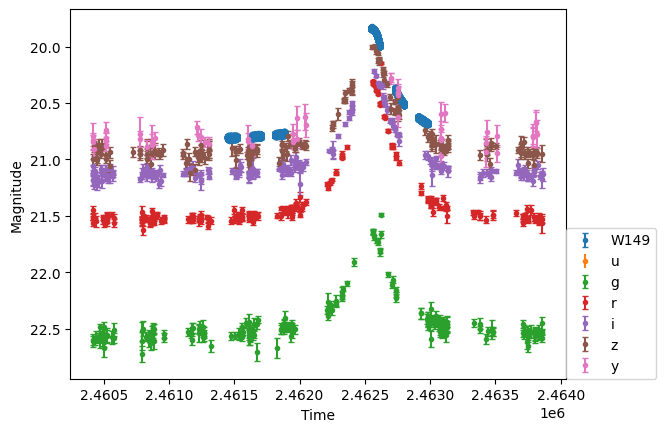

In [14]:
#plot without alignment
telescopes = my_own_model.event.telescopes

for telo in telescopes:
    plt.errorbar(telo.lightcurve_magnitude['time'],telo.lightcurve_magnitude['mag'],telo.lightcurve_magnitude['err_mag'],ls='',marker='.',capsize=2,label=telo.name)

plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.legend(loc=(1,0))
plt.gca().invert_yaxis()
plt.show()
